# Introduction
The goal of this notebook is to answer the following questions (MC = Martinotti cell):
1. Distribution of all tagged MCs?
1. 

In [1]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from experiment.v1dd_em_client import V1DDEMClient
import analysis_tools as at
at.set_stylesheet()
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
em_client = V1DDEMClient()

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:21: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


## Find Martinotti cells

In [3]:
cell_type_table = em_client.get_cell_type_table()
cell_type_table.head(10)

,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,dendrite_proofreading_status
0,0,1132,t,350562,coarse_manual,PYC,350562,t,326.965400,94866276031228266,864691132773514104,"[894573, 478559, 163530]","[891003, 473981, 17111]","[898608, 483370, 18134]","[-13.227572489957907, 226.5862979342913, -382....",not_started,not_started
1,1,214,t,383955,coarse_manual,PYC,383955,t,504.192300,95649060060623076,864691132569667100,"[920802, 795478, 329220]","[914826, 790822, 34920]","[926389, 800366, 36123]","[14.741818935006158, 576.1578669978572, -307.2...",not_started,not_started
2,2,13,t,385028,coarse_manual,PYC,385028,t,415.785065,95863052645657911,864691132781402571,"[929338, 898530, 386595]","[924914, 892245, 41162]","[933994, 903885, 42103]","[23.848399659480666, 690.7637364002102, -279.5...",not_started,not_started
3,3,717,t,293764,coarse_manual,PYC,293764,t,231.369357,94450111081742956,864691132625300120,"[878665, 697702, 245475]","[874009, 694365, 26030]","[883554, 701349, 26859]","[-27.97517873296875, 459.74380331495826, -361....",not_started,not_started
4,4,2604,t,351373,coarse_manual,PYC,351373,t,277.321739,96276193669654108,864691132689074198,"[944314, 572378, 210330]","[939814, 568187, 22179]","[948505, 576413, 23110]","[37.02512562261708, 329.260361441734, -362.108...",not_started,not_started
5,5,3107,t,384793,coarse_manual,Non-neuronal,384793,t,176.705265,96002003427327315,864691132700601419,"[934304, 833734, 374445]","[928794, 830786, 39867]","[940434, 836606, 40890]","[28.48738755819702, 625.0561090808981, -273.94...",not_started,not_started
6,6,3126,t,384639,coarse_manual,PYC,384639,t,255.960178,96987371937497920,864691132805623033,"[968215, 841029, 365895]","[963171, 837459, 39018]","[972949, 844754, 39828]","[62.42156172336766, 629.6272960895836, -284.13...",not_started,not_started
7,7,3510,t,397015,coarse_manual,PYC,397015,t,286.041850,98398182660372459,864691132985597280,"[1018267, 966741, 305775]","[1013146, 962473, 32534]","[1023156, 971397, 33344]","[112.99574837787077, 734.4076867037824, -375.7...",not_started,not_started
8,8,2131,t,266732,coarse_manual,Non-neuronal,266732,t,190.102206,91346052585924801,864691132697512582,"[769870, 413841, 332595]","[766455, 409030, 35449]","[773594, 419506, 36322]","[-138.01414299146796, 210.1077240338913, -201....",not_started,not_started
9,9,1578,t,278239,coarse_manual,PYC,278239,t,258.657505,92547406344001512,864691132679400495,"[812006, 598296, 286875]","[807894, 594028, 30477]","[816274, 602642, 31331]","[-95.05493981461576, 375.38068857135727, -295....",not_started,not_started


In [4]:
mc_cells = cell_type_table[cell_type_table.cell_type == "MC"]
print(f"There are {len(mc_cells)} typed MC cells in total")
mc_cells.head()

There are 75 typed MC cells in total


,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,dendrite_proofreading_status
27,27,2694,t,278405,coarse_manual,MC,278405,t,336.579200,90436412738338039,864691132823412073,"[737898, 601710, 294075]","[732777, 597520, 31127]","[742554, 605668, 32199]","[-169.1360545116018, 380.96626861854804, -289....",not_started,allen_qa
68,68,3103,t,382939,coarse_manual,MC,382939,t,365.528991,96564884326155374,864691132680249683,"[954713, 832803, 276660]","[950367, 827604, 29372]","[959446, 838080, 30230]","[48.76137539402035, 597.8819747458596, -367.91...",not_started,not_started
163,163,2476,t,369459,coarse_manual,MC,369459,t,223.265724,95859204153225435,864691132741433380,"[929493, 759782, 302040]","[925147, 755126, 32146]","[933606, 764670, 32951]","[23.2252972938983, 534.446067466164, -323.9109...",not_started,not_started
194,194,2541,t,276437,coarse_manual,MC,276437,t,285.529970,90505269452366633,864691132669133740,"[739528, 547468, 211320]","[734484, 542191, 22208]","[744184, 552279, 23304]","[-167.87648645143548, 306.54409281406834, -354...",not_started,not_started
247,247,2936,t,296839,coarse_manual,MC,296839,t,338.353029,94098130324441685,864691132633391957,"[868344, 692580, 377325]","[863688, 688157, 40114]","[873543, 696848, 41230]","[-38.14493156762456, 490.1543693092254, -233.3...",not_started,not_started


In [7]:
mc_cells_proof = mc_cells[(mc_cells.axon_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE)) | (mc_cells.dendrite_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE))]
print(f"{len(mc_cells_proof)} MCs have done axon or dendrite proofreading")

11 MCs have done axon or dendrite proofreading


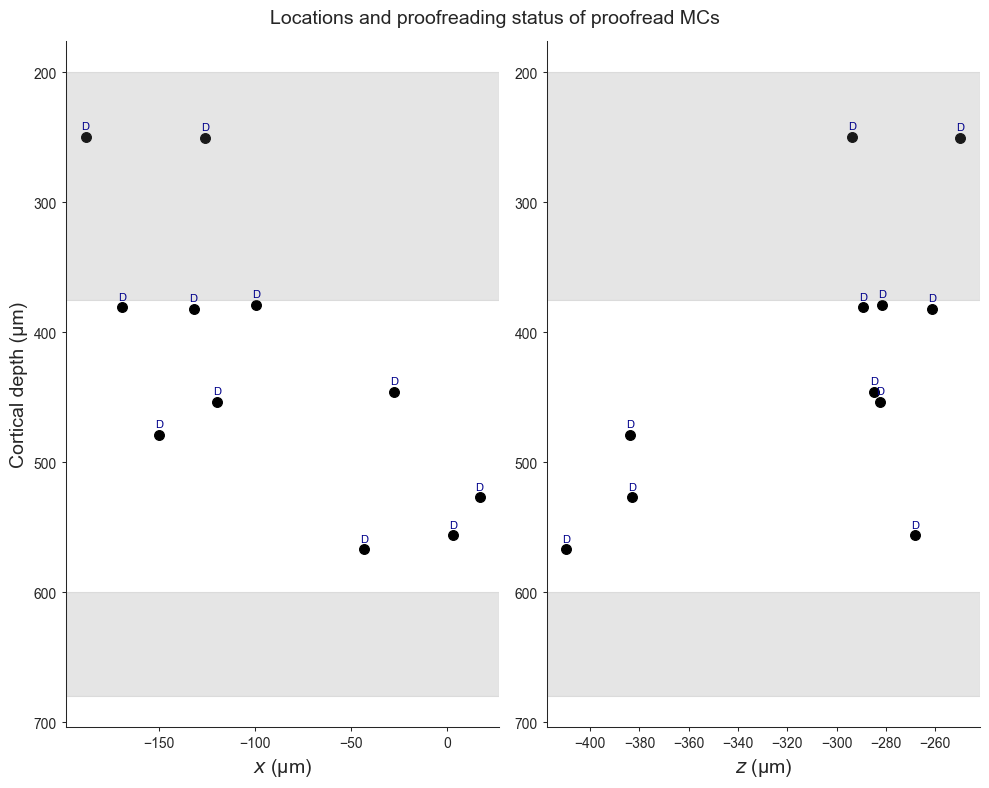

In [17]:
# Visualize the depths of these cells
x_positions = mc_cells_proof.position_microns.apply(lambda pos: pos[0])
y_positions = mc_cells_proof.position_microns.apply(lambda pos: pos[1])
z_positions = mc_cells_proof.position_microns.apply(lambda pos: pos[2])
dendrite_proof = mc_cells_proof.dendrite_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_DONE)
axon_proof = mc_cells_proof.axon_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_DONE)

fig, axs = plt.subplots(figsize=(10, 8), ncols=2)

fig.suptitle("Locations and proofreading status of proofread MCs", fontsize=14)

ax = axs[0]
ax.scatter(x_positions, y_positions, color="black", s=50)
ax.set_xlabel("$x$ (µm)", fontsize=14)
ax.set_ylabel("Cortical depth (µm)", fontsize=14)

ax = axs[1]
ax.scatter(z_positions, y_positions, color="black", s=50)
ax.set_xlabel("$z$ (µm)", fontsize=14)

for ax, xpos in zip(axs, (x_positions, z_positions)):
    ax.invert_yaxis() # Open down


    # Text based on proofreading
    for x, y, dprf, aprf in zip(xpos, y_positions, dendrite_proof, axon_proof):
        if dprf or aprf:
            proof_text = "D" if dprf else ""
            if aprf: proof_text += "A"
            ax.text(x, y-6, proof_text, horizontalalignment="center", fontsize=8, color="darkblue")
        
        # ax.text(x, y-6, f"{y:.0f} µm", horizontalalignment="center", fontsize=10)

    # Shade depth chunks
    # 200-300, 300-400, 400-500, 500-600
    #    G        W        G        W
    ax.axhspan(ymin=200, ymax=300, color="gray", alpha=0.2)
    ax.axhspan(ymin=400, ymax=500, color="gray", alpha=0.2)

fig.tight_layout()

In [9]:
# Load the synapses of these cells
mc_pt_root_ids = mc_cells_proof.pt_root_id.values
print(f"Loading dendritic synapses for {len(mc_pt_root_ids)} MCs...")
dendritic_synapses = em_client.get_dendritic_synapses(mc_pt_root_ids)
print(f"Done. Loading axonal synapses for {len(mc_pt_root_ids)} MCs...")
axonal_synapses = em_client.get_axonal_synapses(mc_pt_root_ids)
print(f"Done. There are {len(dendritic_synapses):,} total dendritic synapses and {len(axonal_synapses):,} total axonal synapses.")

Loading dendritic synapses for 11 MCs...
Done. Loading axonal synapses for 11 MCs...
Done. There are 76,471 total dendritic synapses and 49,730 total axonal synapses.


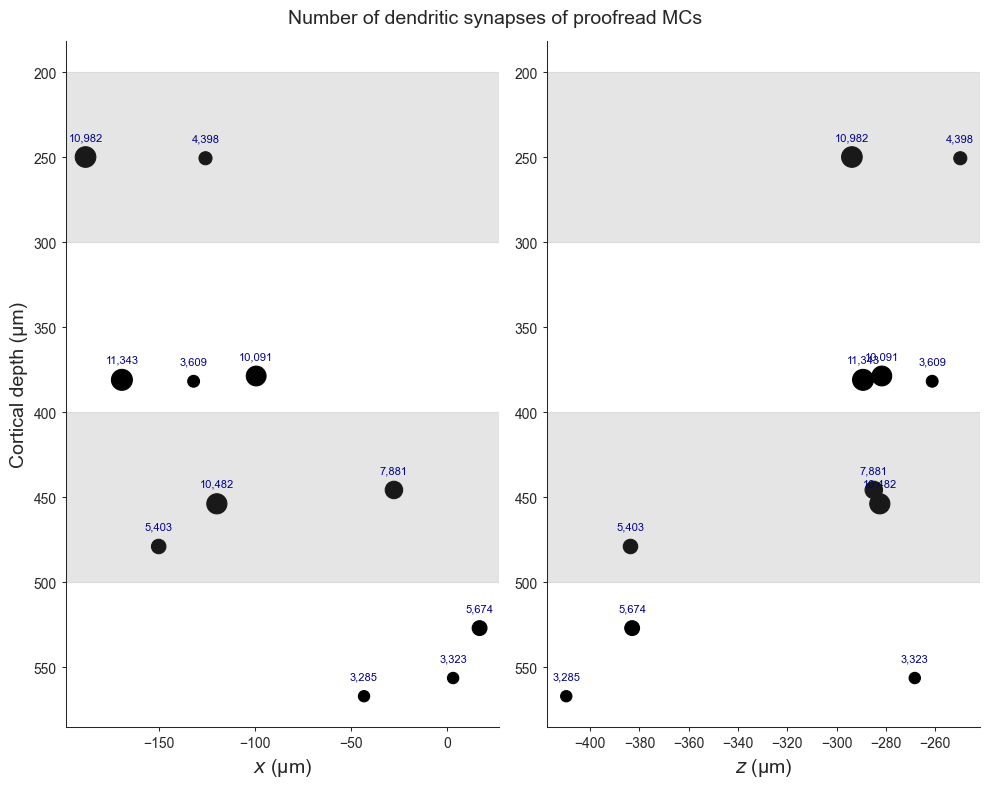

In [18]:
# Visualize the number of dendrites of these cells
x_positions = mc_cells_proof.position_microns.apply(lambda pos: pos[0])
y_positions = mc_cells_proof.position_microns.apply(lambda pos: pos[1])
z_positions = mc_cells_proof.position_microns.apply(lambda pos: pos[2])
dendrite_proof = mc_cells_proof.dendrite_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE)
axon_proof = mc_cells_proof.axon_proofreading_status.isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE)
n_dendritic_synapses = dendritic_synapses.post_pt_root_id.value_counts()[mc_cells_proof.pt_root_id]
scatter_size = 0.02 * n_dendritic_synapses.values

fig, axs = plt.subplots(figsize=(10, 8), ncols=2)

fig.suptitle("Number of dendritic synapses of proofread MCs", fontsize=14)

ax = axs[0]
ax.scatter(x_positions, y_positions, color="black", s=scatter_size)
ax.set_xlabel("$x$ (µm)", fontsize=14)
ax.set_ylabel("Cortical depth (µm)", fontsize=14)

ax = axs[1]
ax.scatter(z_positions, y_positions, color="black", s=scatter_size)
ax.set_xlabel("$z$ (µm)", fontsize=14)

for ax, xpos in zip(axs, (x_positions, z_positions)):
    ax.invert_yaxis() # Open down

    # Text based on proofreading
    for x, y, n_d_syn in zip(xpos, y_positions, n_dendritic_synapses):
        ax.text(x, y-10, f"{n_d_syn:,}", horizontalalignment="center", fontsize=8, color="darkblue")

    # Shade depth chunks
    # for i in range(0, len(V1DDEMClient.LAYER_NAMES), 2):
    #     ax.axhspan(ymin=V1DDEMClient.LAYER_BOUNDARIES[i], ymax=V1DDEMClient.LAYER_BOUNDARIES[i+1], color="gray", alpha=0.2)
    ax.axhspan(ymin=200, ymax=300, color="gray", alpha=0.2)
    ax.axhspan(ymin=400, ymax=500, color="gray", alpha=0.2)

fig.tight_layout()

In [11]:
corresponded_table = em_client.get_2p_corresponded_table()
corresponding_roi = pd.Series(data=corresponded_table.roi_lookup.values, index=corresponded_table.pt_root_id.values)
corresponded_table.head()

,index,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position,roi_lookup,position_microns,axon_proofreading_status,dendrite_proofreading_status
0,0,90,t,session13,plane2_014,92055099945608124,864691132710145793,"[88274, 67650, 5900]",1-3-3-14,"[-112.57258685416217, 379.9149525558736, -318....",not_started,not_started
1,1,100,t,session13,plane2_0300,93884343697112472,864691132771651091,"[95465, 66304, 6155]",1-3-3-300,"[-47.89719736504345, 370.9927208177657, -304.4...",not_started,allen_qa
2,2,105,t,session13,plane4_0109,93321943633527277,864691132633478997,"[93318, 68348, 6990]",1-3-5-109,"[-67.08166382155882, 398.8715816165777, -273.1...",not_started,allen_qa
3,3,101,t,session13,plane2_0191,93110699693734118,864691132771649811,"[92585, 67831, 5022]",1-3-3-191,"[-73.81890019900177, 370.71513983959437, -357....",not_started,allen_qa
4,4,103,t,session13,plane3_0089,93393411553455652,864691132982282172,"[93499, 72719, 4155]",1-3-4-89,"[-65.43400252395776, 402.61649847251164, -406....",not_started,allen_qa


In [12]:
def anyna(*args):
    for arg in args:
        if np.any(pd.isna(arg)):
            return True
    return False

dist_fn_euc = lambda this, other: np.inf if anyna(this, other) else np.sqrt(np.sum(np.square(this - other)))
dist_fn_horiz = lambda this, other: np.inf if anyna(this, other) else np.sqrt(np.sum(np.square(this[[0, 2]] - other[[0, 2]])))
dist_fn_vert = lambda this, other: np.inf if anyna(this, other) else other[1] - this[1] # e.g., +200 means other is 200 microns deeper than this

def plot_dist(ax, syn, this_soma_position_key, other_position_key, dist_fn, syn_size_weighted=False):
    syn = syn.dropna(subset=other_position_key)
    dists = syn.apply(lambda row: dist_fn(row[this_soma_position_key], row[other_position_key]), axis=1)
    xmin, xmax = 0, (300 if other_position_key == "position_microns" else 700) # 300 microns for synapse distances
    dist_range = np.arange(xmin, xmax+1, 1) # Steps of 1 micron
    weights = syn["size"] if syn_size_weighted else None
    frac_within_dist = np.array([np.average(dists <= d, weights=weights) for d in dist_range])

    ax.plot(dist_range, frac_within_dist, linewidth=2)
    ax.set_xlabel("Distance ($\mu$m)", fontsize=14)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, 1)


def plot_vert_dist(ax, syn, this_soma_position_key, other_position_key, syn_size_weighted=False):
    syn = syn.dropna(subset=other_position_key)
    vert_pos = syn.apply(lambda row: row[other_position_key][1], axis=1)
    this_soma_vert_pos = syn[this_soma_position_key].values[0][1] # since all values are the same
    xmin, xmax = 0, 800, # np.max(other_soma_vert_pos)
    dist_range = np.arange(xmin, xmax+1, 1) # Steps of 1 micron
    weights = syn["size"] if syn_size_weighted else None
    frac_cells_within_dist = np.array([np.average(vert_pos <= d, weights=weights) for d in dist_range])

    p = ax.plot(dist_range, frac_cells_within_dist, linewidth=2)
    ax.scatter(this_soma_vert_pos, np.average(vert_pos <= this_soma_vert_pos, weights=weights), color=p[0].get_color(), s=50) # Draw point to show soma location
    ax.set_xlabel("Depth ($\mu$m)", fontsize=14)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, 1)

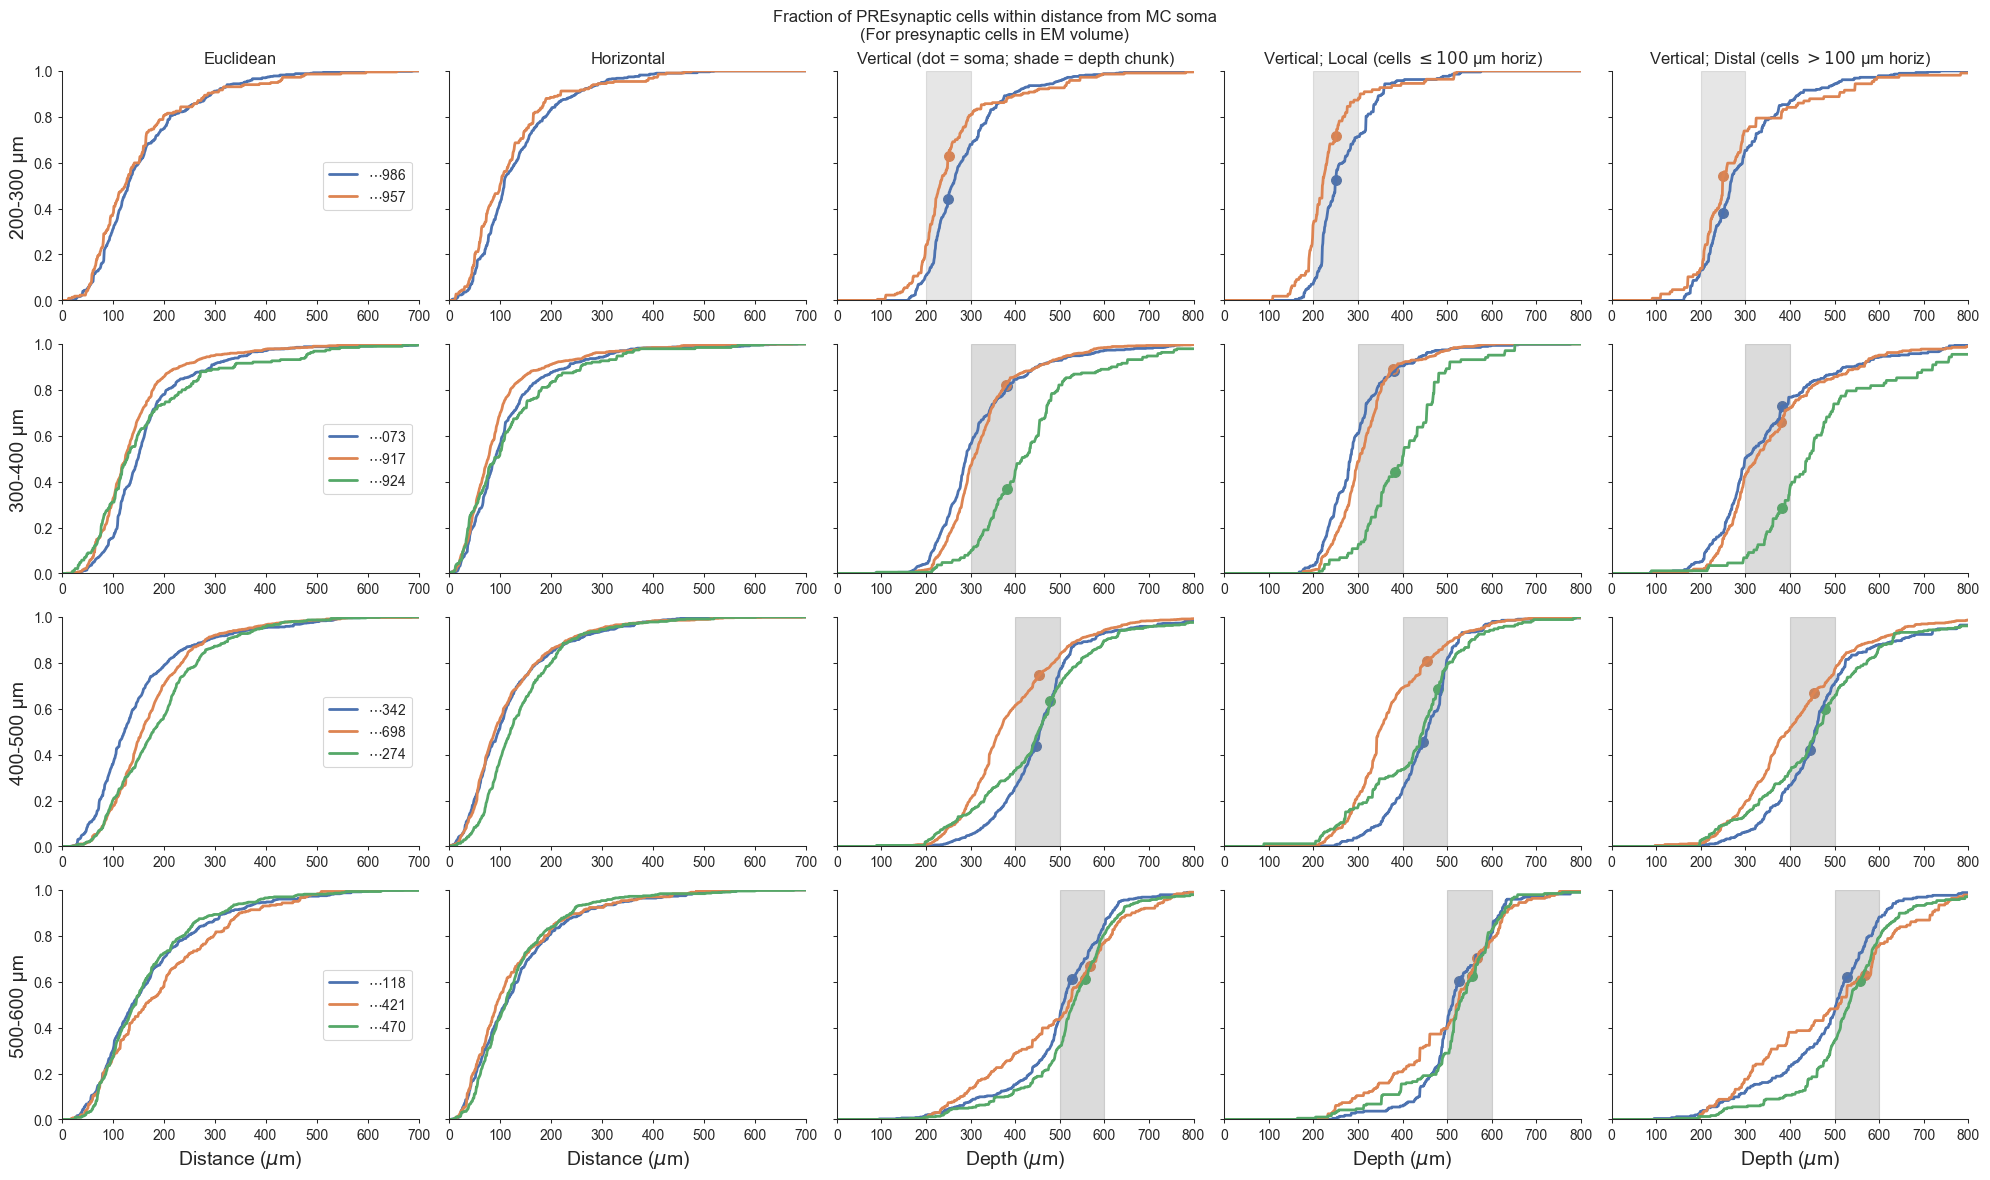

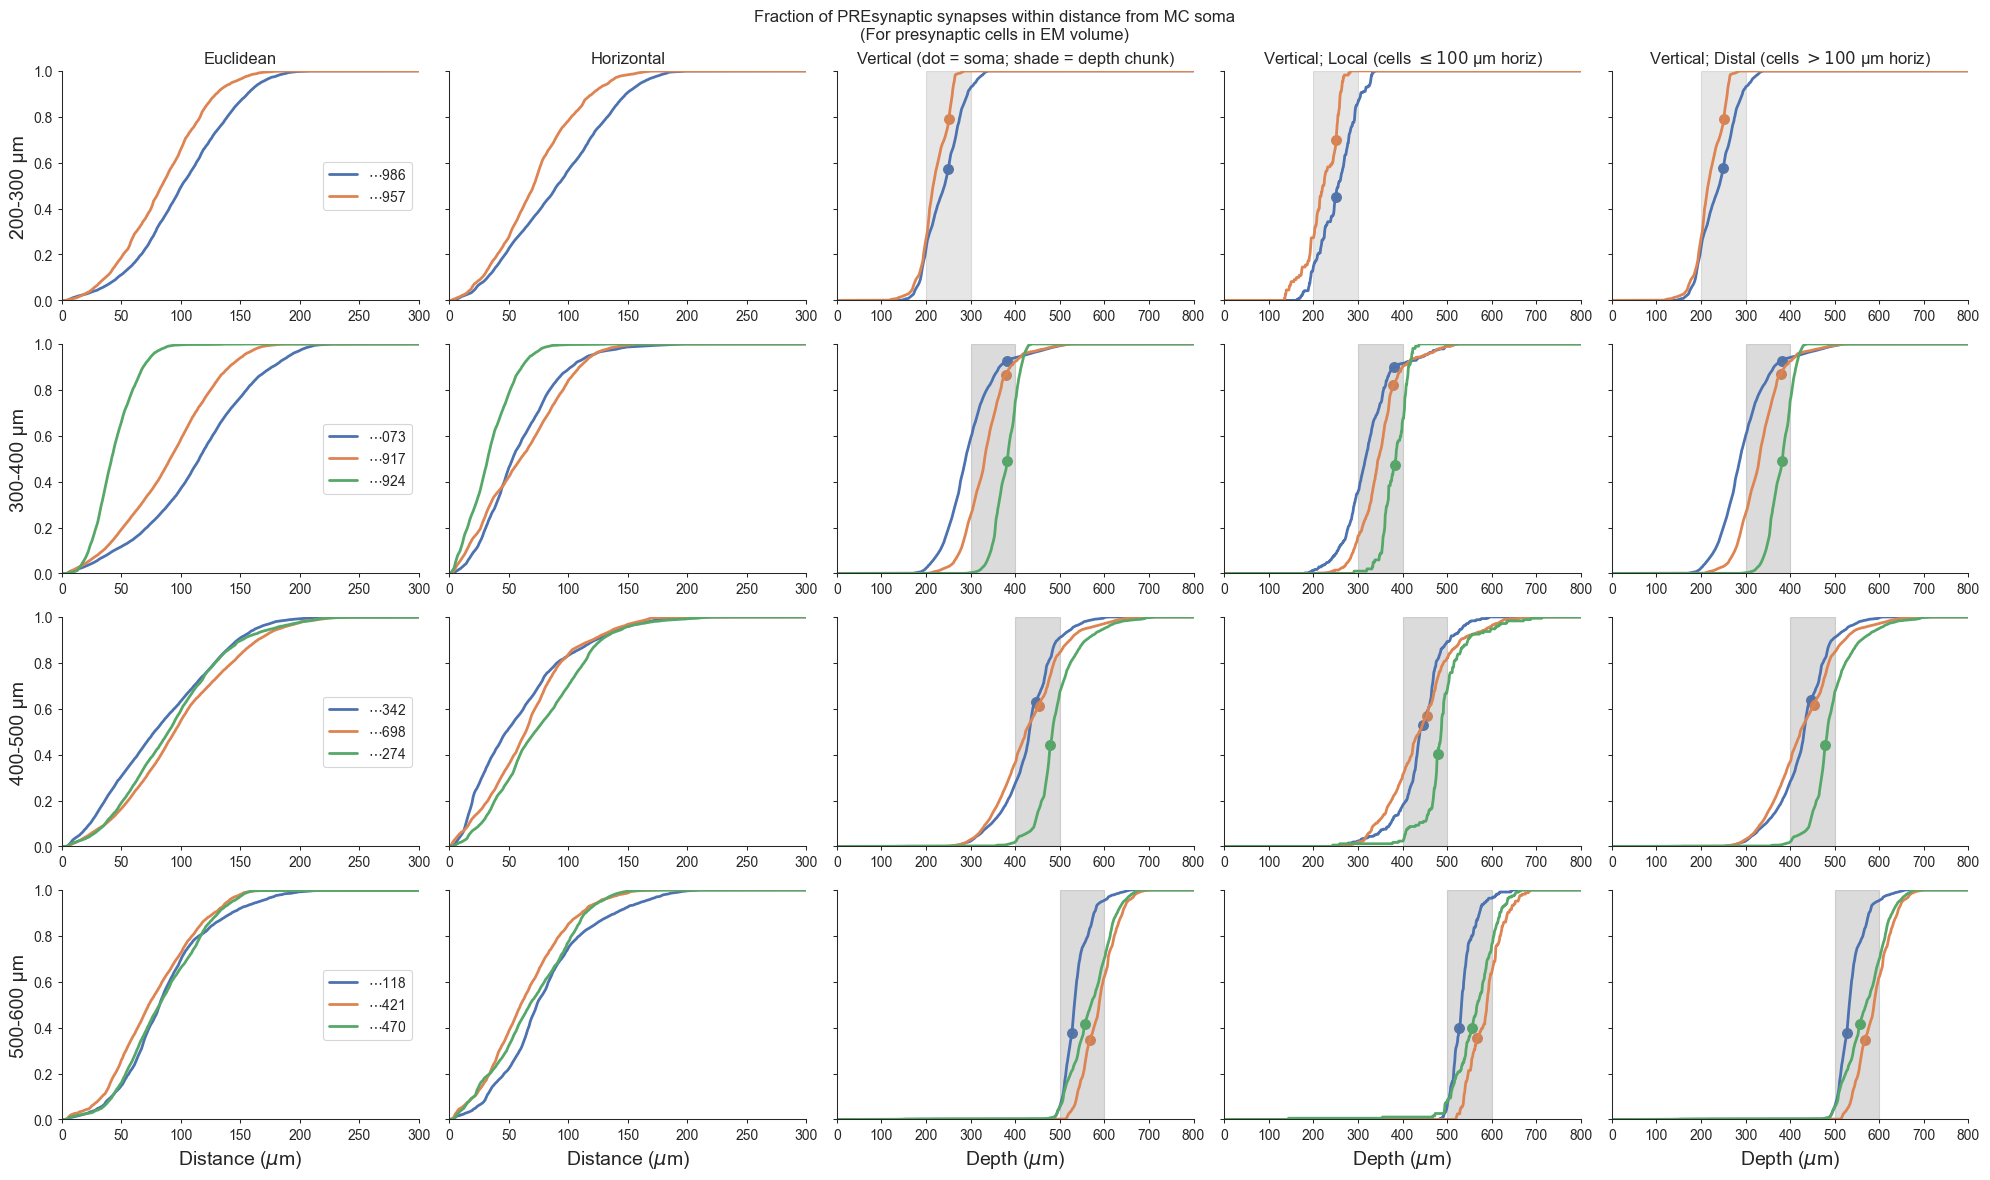

In [21]:
# fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)
nrows, ncols = len(V1DDEMClient.LAYER_NAMES), 5

boundaries = V1DDEMClient.LAYER_BOUNDARIES
# boundaries = [200, 300, 400, 500, 600]

for title_type, this_soma_position_key, other_position_key in (("cells", "post_soma_position", "pre_soma_position"), ("synapses", "post_soma_position", "position_microns")):
    # for syn_size_weighted in (False, True):
    for syn_size_weighted in (False,):
        fig, axs = plt.subplots(figsize=(20, 12), nrows=nrows, ncols=ncols)
        mc_cell_depths = mc_cells_proof.position_microns.apply(lambda pos: pos[1])

        for col in range(ncols):
            for row, ax in enumerate(axs[:, col]):
                # layer_name = V1DDEMClient.LAYER_NAMES[row]
                depth_min, depth_max = boundaries[row], boundaries[row+1]
                pt_root_ids_in_chunk = mc_cells_proof.pt_root_id[(depth_min <= mc_cell_depths) & (mc_cell_depths < depth_max)]

                for pt_root_id in pt_root_ids_in_chunk:
                    cell_den_syn = dendritic_synapses[dendritic_synapses.post_pt_root_id == pt_root_id]
                    cell_den_syn_has_ophys = cell_den_syn[cell_den_syn.pre_pt_root_id.isin(corresponded_table.pt_root_id)]
                    presyn_rois = cell_den_syn_has_ophys.pre_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
                    # presyn_metrics = metrics.loc[roi_lookup_to_metrics_idx[presyn_rois].values]
                    
                    cell_axo_syn = axonal_synapses[axonal_synapses.pre_pt_root_id == pt_root_id]
                    cell_axo_syn_has_ophys = cell_axo_syn[cell_axo_syn.post_pt_root_id.isin(corresponded_table.pt_root_id)]
                    postsyn_rois = cell_axo_syn_has_ophys.post_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
                    # postsyn_metrics = metrics.loc[roi_lookup_to_metrics_idx[postsyn_rois].values]

                    if col == 0:
                        plot_dist(ax, cell_den_syn, this_soma_position_key, other_position_key, dist_fn_euc, syn_size_weighted=syn_size_weighted)
                        if row == 0: ax.set_title("Euclidean")
                    if col == 1:
                        plot_dist(ax, cell_den_syn, this_soma_position_key, other_position_key, dist_fn_horiz, syn_size_weighted=syn_size_weighted)
                        if row == 0: ax.set_title("Horizontal")
                    elif col == 2:
                        plot_vert_dist(ax, cell_den_syn, this_soma_position_key, other_position_key, syn_size_weighted=syn_size_weighted)
                        if row == 0: ax.set_title("Vertical (dot = soma; shade = depth chunk)")
                        ax.axvspan(depth_min, depth_max, color="gray", alpha=0.1)
                    elif col == 3:
                        cell_den_syn_local = cell_den_syn[cell_den_syn.apply(lambda row: dist_fn_horiz(row["post_soma_position"], row["pre_soma_position"]), axis=1) <= 100]
                        plot_vert_dist(ax, cell_den_syn_local, this_soma_position_key, other_position_key, syn_size_weighted=syn_size_weighted)
                        if row == 0: ax.set_title("Vertical; Local (cells $\leq 100$ µm horiz)")
                        ax.axvspan(depth_min, depth_max, color="gray", alpha=0.1)
                    elif col == 4:
                        cell_den_syn_local = cell_den_syn[cell_den_syn.apply(lambda row: dist_fn_horiz(row["post_soma_position"], row["pre_soma_position"]), axis=1) > 100]
                        plot_vert_dist(ax, cell_den_syn_local, this_soma_position_key, other_position_key, syn_size_weighted=syn_size_weighted)
                        if row == 0: ax.set_title("Vertical; Distal (cells $>100$ µm horiz)")
                        ax.axvspan(depth_min, depth_max, color="gray", alpha=0.1)
                    
                if row < nrows-1: ax.set_xlabel("")

                if col == 0:
                    # ax.set_ylabel(f"{depth_min}-{depth_max} µm ({len(pt_root_ids_in_chunk)} MCs)", fontsize=14)
                    ax.set_ylabel(f"{depth_min}-{depth_max} µm", fontsize=14)
                    ax.legend(ax.lines, [f"$\cdots${str(pt_root_id)[-3:]}" for pt_root_id in pt_root_ids_in_chunk], loc="center right")
                else:
                    ax.set_yticklabels([])

        fig.suptitle(f"Fraction of PREsynaptic {title_type} within distance from MC soma{', weighted by synapse size' if syn_size_weighted else ''}\n(For presynaptic cells in EM volume)")
        fig.tight_layout()

In [14]:
print("Format: {2P corresponded} / {soma in EM volume} / {total}")

for i in range(len(layer_boundaries) - 1):
    depth_min, depth_max = depth_chunks[i], depth_chunks[i+1]
    in_chunk = (depth_min <= mc_cell_depths) & (mc_cell_depths < depth_max)
    pt_root_ids_in_chunk = mc_cells_proof.pt_root_id[in_chunk]
    dproof, aproof = mc_cells_proof.dendrite_proofreading_status[in_chunk].isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE), mc_cells_proof.axon_proofreading_status[in_chunk].isin(V1DDEMClient.PROOFREADING_STATUS_COMPLETE)

    print(f"\n====== {depth_min} to {depth_max} µm ======")
    
    for pt_root_id, depth, dp, ap in zip(pt_root_ids_in_chunk, mc_cell_depths[in_chunk], dproof, aproof):
        print(f"\n - {pt_root_id} ({'D' if dp else ''}{'A' if ap else ''}) ({depth:.0f} µm)")

        den_syn = dendritic_synapses[dendritic_synapses.post_pt_root_id == pt_root_id]
        axo_syn = axonal_synapses[axonal_synapses.pre_pt_root_id == pt_root_id]
        den_syn_unique = den_syn.drop_duplicates("pre_pt_root_id")
        axo_syn_unique = axo_syn.drop_duplicates("post_pt_root_id")
        n_in_vol_pre = np.count_nonzero(~den_syn.pre_soma_position.isna())
        n_in_vol_post = np.count_nonzero(~axo_syn.post_soma_position.isna())
        n_in_vol_pre_unique = np.count_nonzero(~den_syn_unique.pre_soma_position.isna())
        n_in_vol_post_unique = np.count_nonzero(~axo_syn_unique.post_soma_position.isna())
        n_corresponded_pre = den_syn.pre_pt_root_id.isin(corresponded_table.pt_root_id).sum()
        n_corresponded_post = axo_syn.post_pt_root_id.isin(corresponded_table.pt_root_id).sum()
        n_corresponded_pre_unique = den_syn_unique.pre_pt_root_id.isin(corresponded_table.pt_root_id).sum()
        n_corresponded_post_unique = axo_syn.post_pt_root_id.isin(corresponded_table.pt_root_id).sum()

        print(f"    DEN: {n_corresponded_pre} / {n_in_vol_pre} / {len(den_syn)}   (Unique: {n_corresponded_pre_unique} / {n_in_vol_pre_unique} / {len(den_syn_unique)})")
        print(f"    AXO: {n_corresponded_post} / {n_in_vol_post} / {len(axo_syn)}   (Unique: {n_corresponded_post_unique} / {n_in_vol_post_unique} / {len(axo_syn_unique)})")

Format: {2P corresponded} / {soma in EM volume} / {total}

====== 200 to 300 µm ======

 - 864691132718050986 (D) (250 µm)
    DEN: 2 / 499 / 10982   (Unique: 2 / 340 / 9401)
    AXO: 0 / 4159 / 5515   (Unique: 0 / 1962 / 3179)

 - 864691132967182957 (D) (251 µm)
    DEN: 0 / 217 / 4398   (Unique: 0 / 158 / 3954)
    AXO: 0 / 2015 / 2505   (Unique: 0 / 1010 / 1494)

====== 300 to 400 µm ======

 - 864691132823412073 (D) (381 µm)
    DEN: 12 / 814 / 11343   (Unique: 11 / 477 / 9461)
    AXO: 18 / 6184 / 7059   (Unique: 18 / 2730 / 3557)

 - 864691133121058917 (D) (379 µm)
    DEN: 15 / 891 / 10091   (Unique: 11 / 527 / 8781)
    AXO: 63 / 6722 / 8092   (Unique: 63 / 2879 / 4207)

 - 864691132669322924 (D) (382 µm)
    DEN: 1 / 190 / 3609   (Unique: 1 / 152 / 3370)
    AXO: 10 / 362 / 498   (Unique: 10 / 320 / 456)

====== 400 to 500 µm ======

 - 864691132562619342 (D) (446 µm)
    DEN: 20 / 779 / 7881   (Unique: 15 / 517 / 7282)
    AXO: 156 / 6074 / 7638   (Unique: 156 / 2524 / 4068)


## For a single Martinotti cell, examine visual response properties of (a) presynaptic and (b) postsynaptic neurons

In [26]:
# This is an example MC that has a lot of synapses from/on 2P-corresponded cells
mc_pt_root_id = 864691132562619342

In [24]:
# Load metrics since we'll need that too
from stimulus_analysis import fit_utils

metrics = pd.read_csv("/Users/chase/Desktop/MindScope/Documents/v1dd-chase/dataframes/v1dd_metrics.csv", index_col=0, low_memory=False)

# Only consider valid metrics
metrics = metrics[metrics.is_valid & (metrics.mouse == 409828) & (metrics.column == 1)]
metrics.insert(5, "roi_lookup", metrics.apply(lambda row: f"{row.column}-{row.volume}-{row.plane}-{row.roi}", axis=1))
metrics["ssi_fit"] = fit_utils.compute_dg_fit_ssi_from_metrics(metrics)
metrics["dgw_pref_dir_fit"] = fit_utils.get_dg_pref_dir(metrics, "dgw")
metrics["dgf_pref_dir_fit"] = fit_utils.get_dg_pref_dir(metrics, "dgf")

roi_lookup_to_metrics_idx = pd.Series(data=metrics.index, index=metrics.roi_lookup.values)

metrics.head()

,mouse,column,volume,plane,roi,roi_lookup,is_valid,depth,dgf_pref_response,dgf_pref_dir,...,ssi,ffsi,ssi_pref_both,ssi_orth,ffsi_all_dirs,spontaneous_event_mean,spontaneous_event_std,ssi_fit,dgw_pref_dir_fit,dgf_pref_dir_fit
M409828_11_1_89,409828,1,1,1,89,1-1-1-89,True,50,0.000943,330.0,...,0.265065,0.419054,0.033453,-0.139243,"[0.41905364, 0.61911654, 0.07141414, -0.801465...",0.000287,0.001903,0.173092,351.613700,63.683119
M409828_11_2_0,409828,1,1,2,0,1-1-2-0,True,66,0.000919,270.0,...,-0.084075,-0.183585,-0.088211,0.064530,"[-0.18358487, 0.04251838, -0.30215508, -0.1352...",0.000346,0.002629,-0.076999,46.319837,71.813432
M409828_11_2_1,409828,1,1,2,1,1-1-2-1,True,66,0.011217,0.0,...,-0.065169,-0.139425,-0.157938,0.044509,"[-4.483465, -0.13942526, -0.10395071, 1.0, -1....",0.000341,0.002262,-0.357757,20.629574,14.344481
M409828_11_2_2,409828,1,1,2,2,1-1-2-2,True,66,0.001237,120.0,...,0.536319,0.698187,-0.005231,-0.203358,"[-0.3096417, 0.6981869, 0.36546794, 0.25718334...",0.000341,0.002412,0.238414,360.000000,63.556494
M409828_11_2_4,409828,1,1,2,4,1-1-2-4,True,66,0.001093,240.0,...,-0.034136,-0.070685,-0.278688,-0.394162,"[-1.098053, -0.15058127, -0.28383604, -2.51381...",0.000234,0.001601,-0.131294,349.940152,323.599541


(a) First examine presynaptic cells

In [27]:
cell_den_syn = dendritic_synapses[dendritic_synapses.post_pt_root_id == mc_pt_root_id]
print(f"{len(cell_den_syn):,} rows")
cell_den_syn.head()

7,881 rows


,index,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,position_microns,pre_soma_position,post_soma_position
4,4,430811319,t,94307381064167906,864691129233480671,94307381064161529,864691132562619342,1985,"[90165, 64599, 8053]","[90198, 64563, 8059]","[90167, 64571, 8056]","[-31.906025231648005, 422.2968553101102, -229....",None,"[-27.8118484251427, 445.74689403586916, -284.9..."
13,13,452149120,t,94871705340229770,864691132631378245,94871774059718363,864691132562619342,1127,"[92312, 69714, 7677]","[92270, 69770, 7683]","[92306, 69752, 7679]","[-11.588183795250487, 466.3316361508814, -259....",None,"[-27.8118484251427, 445.74689403586916, -284.9..."
17,17,445217107,t,94590436454532359,864691132787066561,94590436454538908,864691132562619342,1970,"[91172, 70318, 6956]","[91201, 70297, 6964]","[91202, 70314, 6963]","[-21.97595032100589, 462.647601299032, -292.13...",None,"[-27.8118484251427, 445.74689403586916, -284.9..."
39,40,418356504,t,93813975019913229,864691132853319939,93884275044578600,864691132562619342,809,"[88502, 61327, 6510]","[88545, 61286, 6518]","[88526, 61317, 6512]","[-48.18477557018551, 373.1876034475633, -288.0...","[-30.136203765598708, 275.1188781233953, -272....","[-27.8118484251427, 445.74689403586916, -284.9..."
45,46,459900627,t,95223686567011413,864691132642548894,95223686567006561,864691132562619342,1414,"[93565, 70088, 8093]","[93603, 70059, 8098]","[93594, 70066, 8092]","[1.3800842539139557, 473.96724546683265, -242....",None,"[-27.8118484251427, 445.74689403586916, -284.9..."


In [28]:
cell_den_syn_has_ophys = cell_den_syn[cell_den_syn.pre_pt_root_id.isin(corresponded_table.pt_root_id)]
print(f"{len(cell_den_syn_has_ophys):,} rows")
cell_den_syn_has_ophys.head()

20 rows


,index,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,position_microns,pre_soma_position,post_soma_position
2524,2541,440332286,t,94237699380121673,864691132853487363,94237699380134259,864691132562619342,2072,"[89898, 67123, 6675]","[89871, 67171, 6675]","[89875, 67135, 6679]","[-35.03954418452398, 430.01533027144205, -296....","[-80.9607784082332, 385.021141334214, -323.539...","[-27.8118484251427, 445.74689403586916, -284.9..."
4971,5001,408435222,t,93114067082203379,864691132720617684,93114067082201628,864691132562619342,1388,"[85769, 75397, 5981]","[85729, 75449, 5982]","[85749, 75428, 5981]","[-74.8728970788113, 499.2328493029066, -348.08...","[-120.275786757953, 359.60326492832405, -335.4...","[-27.8118484251427, 445.74689403586916, -284.9..."
6478,6517,424745946,t,93956293123144995,864691132738257819,93956293123153257,864691132562619342,765,"[88980, 67384, 6877]","[88983, 67333, 6887]","[88987, 67363, 6880]","[-43.63278941450012, 434.1259503555526, -287.7...","[-110.58683203977684, 357.3601754865111, -302....","[-27.8118484251427, 445.74689403586916, -284.9..."
6698,6737,440332898,t,94237836819369373,864691132738257819,94237836819359162,864691132562619342,166,"[90042, 67629, 6921]","[90012, 67617, 6915]","[90036, 67623, 6917]","[-33.63672216891439, 437.06778204603296, -287....","[-110.58683203977684, 357.3601754865111, -302....","[-27.8118484251427, 445.74689403586916, -284.9..."
7661,7706,436644706,t,94024394057247257,864691132635895079,94024394057245133,864691132562619342,964,"[89154, 58891, 6174]","[89197, 58917, 6174]","[89182, 58908, 6172]","[-41.9912889337244, 346.871954139902, -296.835...","[-84.5002040614849, 375.5022308609855, -323.36...","[-27.8118484251427, 445.74689403586916, -284.9..."


In [29]:
# Get the 2P ROIs of the corresponded presynaptic cells and the corresponding metrics
presyn_rois = cell_den_syn_has_ophys.pre_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
metrics_idx = roi_lookup_to_metrics_idx[presyn_rois].values
presyn_metrics = metrics.loc[metrics_idx]

Analyze visual response properties of these ROIs

DGW responsive: 5 / 20


<AxesSubplot: >

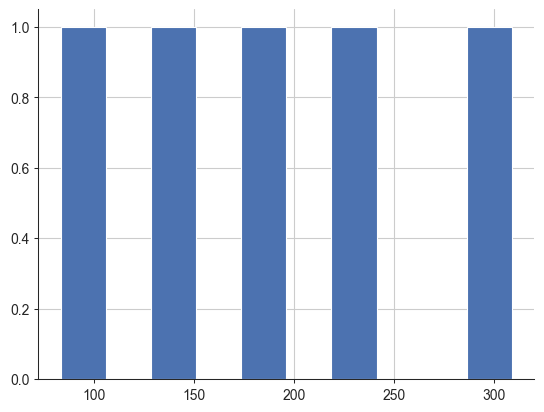

In [42]:
print(f"DGW responsive: {(presyn_metrics.dgw_frac_responsive_trials >= 0.5).sum()} / {len(presyn_metrics)}")
presyn_metrics[presyn_metrics.dgw_frac_responsive_trials >= 0.5].dgw_pref_dir_fit.hist()

<AxesSubplot: >

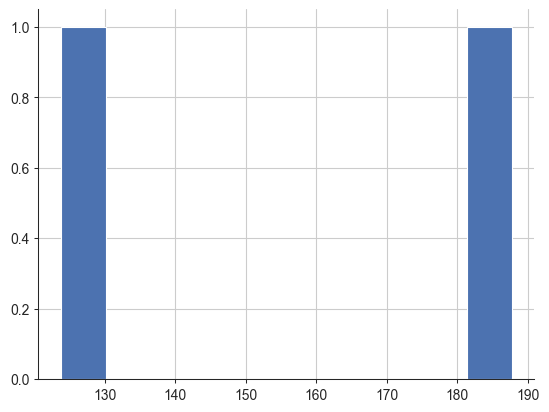

In [31]:
presyn_metrics[presyn_metrics.dgf_frac_responsive_trials >= 0.5].dgf_pref_dir_fit.hist()

<AxesSubplot: >

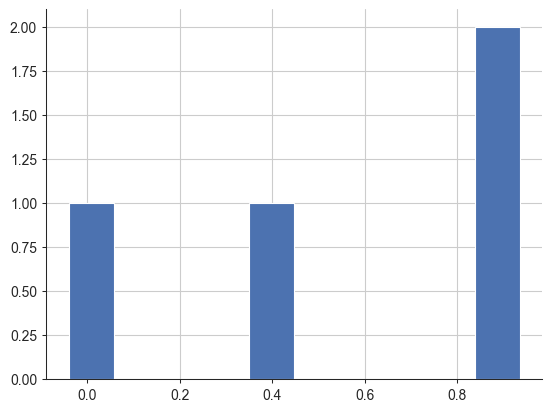

In [32]:
presyn_metrics[presyn_metrics.dgw_frac_responsive_trials >= 0.5].ssi_fit.hist()

(b) Do the same for postsynaptic cells

In [188]:
cell_axo_syn = axonal_synapses[axonal_synapses.pre_pt_root_id == mc_pt_root_id]
print(f"{len(cell_axo_syn):,} rows")

cell_axo_syn_has_ophys = cell_axo_syn[cell_axo_syn.post_pt_root_id.isin(corresponded_table.pt_root_id)]
print(f"{len(cell_axo_syn_has_ophys):,} rows have ophys")

postsyn_rois = cell_axo_syn_has_ophys.post_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
postsyn_metrics = metrics.loc[roi_lookup_to_metrics_idx[postsyn_rois].values]

8,903 rows
119 rows have ophys


<AxesSubplot: >

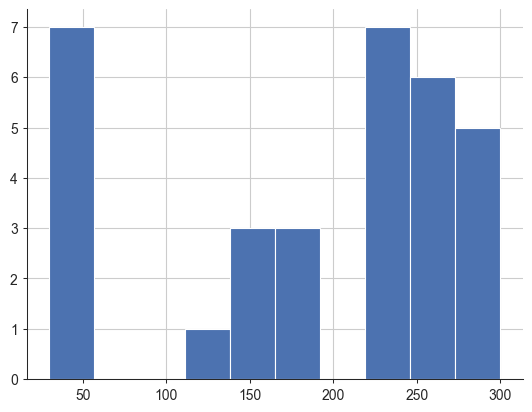

In [189]:
postsyn_metrics[postsyn_metrics.dgw_frac_responsive_trials >= 0.5].dgw_pref_dir.hist()

<AxesSubplot: >

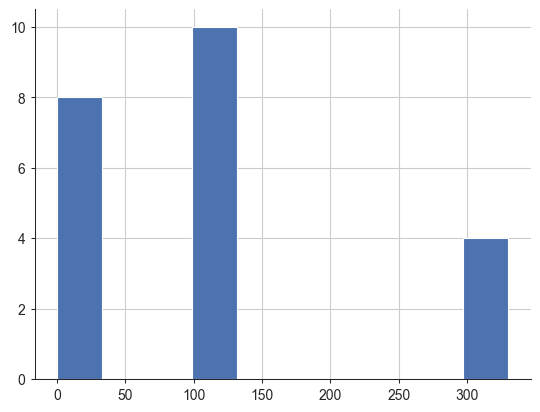

In [190]:
postsyn_metrics[postsyn_metrics.dgf_frac_responsive_trials >= 0.5].dgf_pref_dir.hist()

In [192]:
postsyn_metrics.roi_lookup.unique()

array(['1-3-5-109', '1-3-2-145', '1-3-3-158', '1-3-3-414', '1-3-4-212',
       '1-3-1-209', '1-3-1-671', '1-3-1-65', '1-3-3-14', '1-3-4-98',
       '1-3-3-250', '1-3-3-265', '1-3-3-74', '1-3-3-230', '1-3-3-139',
       '1-3-3-300', '1-3-1-88', '1-3-1-40', '1-3-1-60', '1-3-1-117',
       '1-3-4-89', '1-3-3-25', '1-3-6-470', '1-3-2-75', '1-3-3-269',
       '1-3-5-119', '1-3-5-419', '1-3-2-26', '1-3-4-387', '1-3-3-191',
       '1-3-1-67', '1-3-2-30', '1-3-3-237', '1-3-3-294', '1-3-3-215',
       '1-3-4-306', '1-3-2-667'], dtype=object)

## Visualize all MC cell distributions

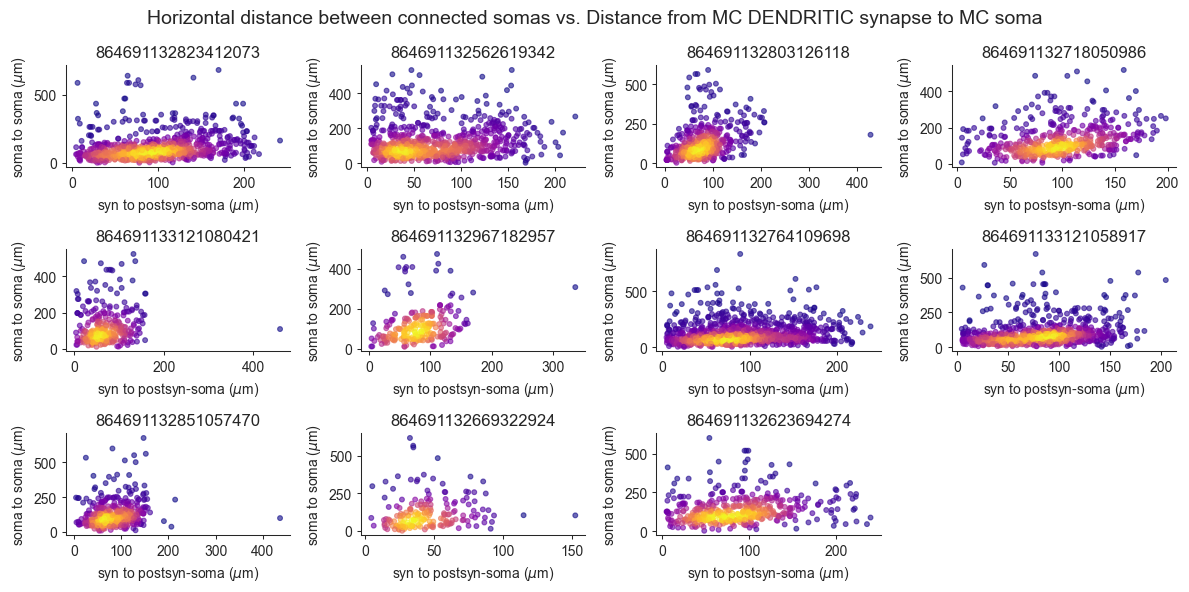

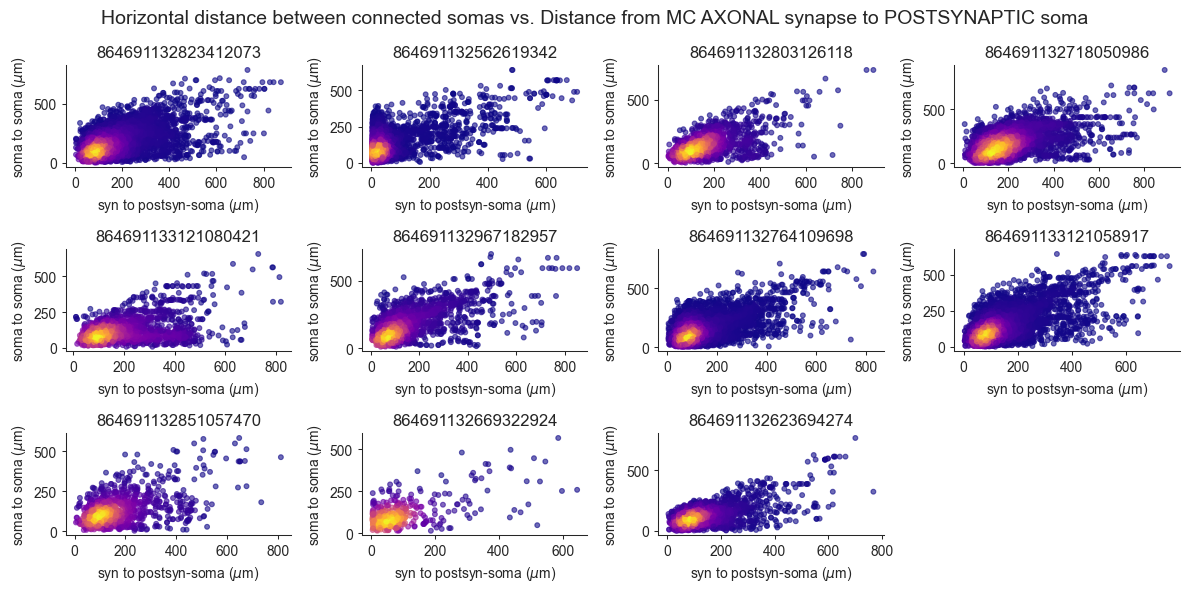

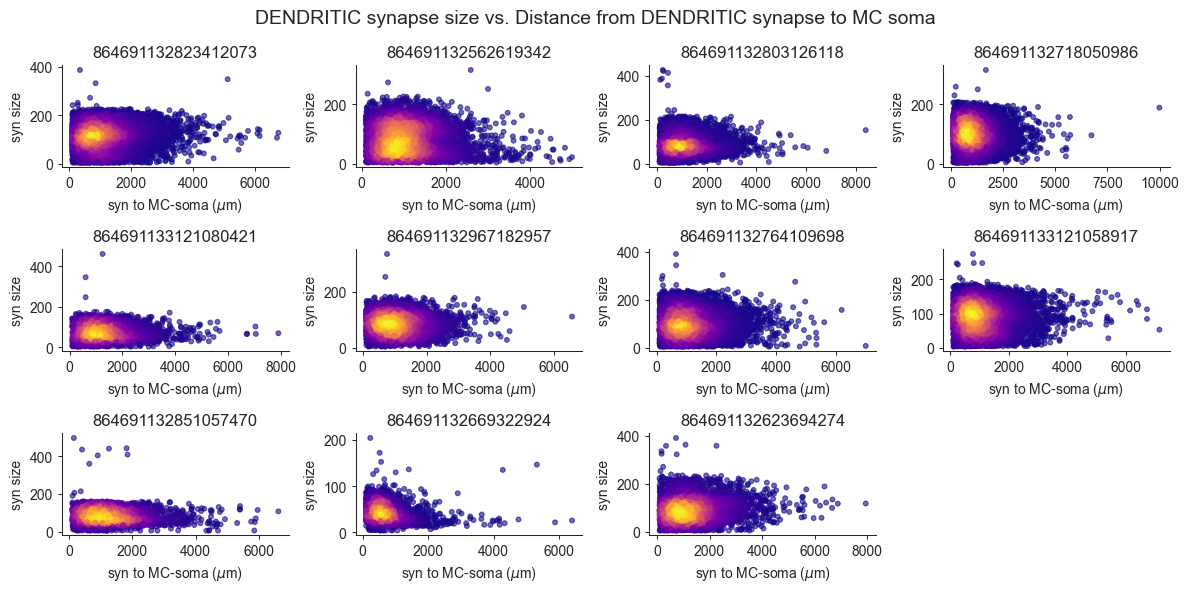

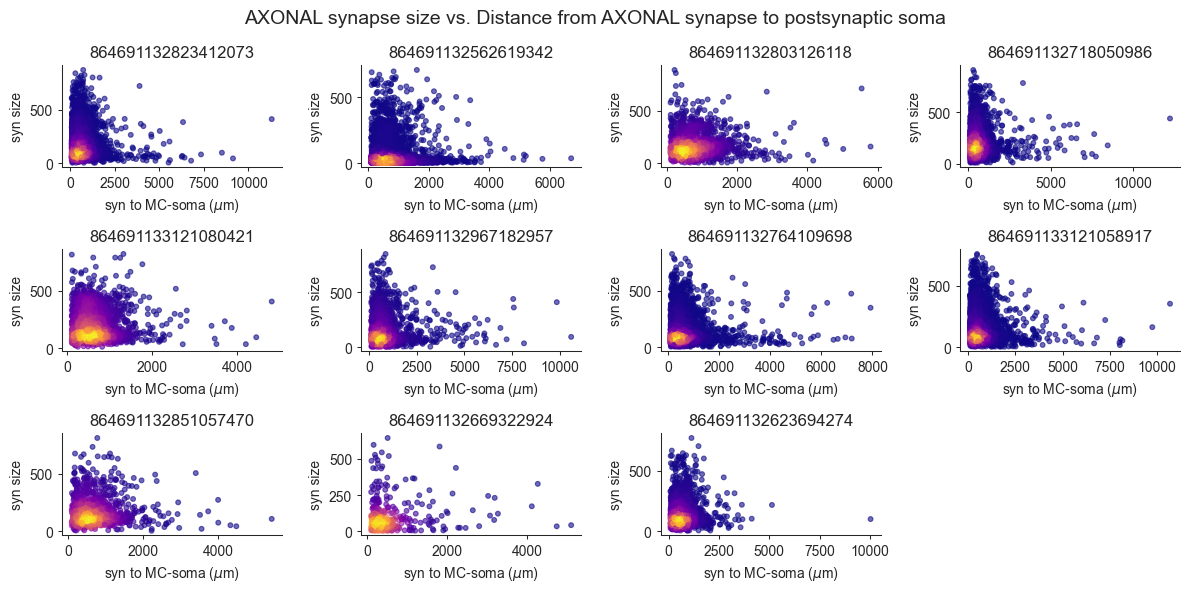

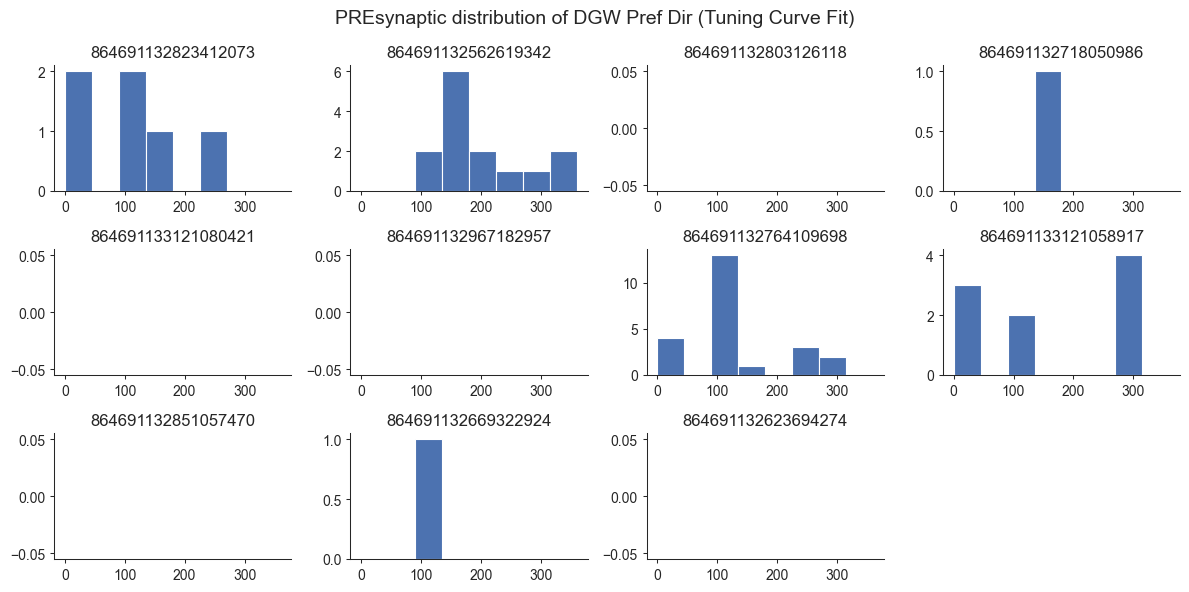

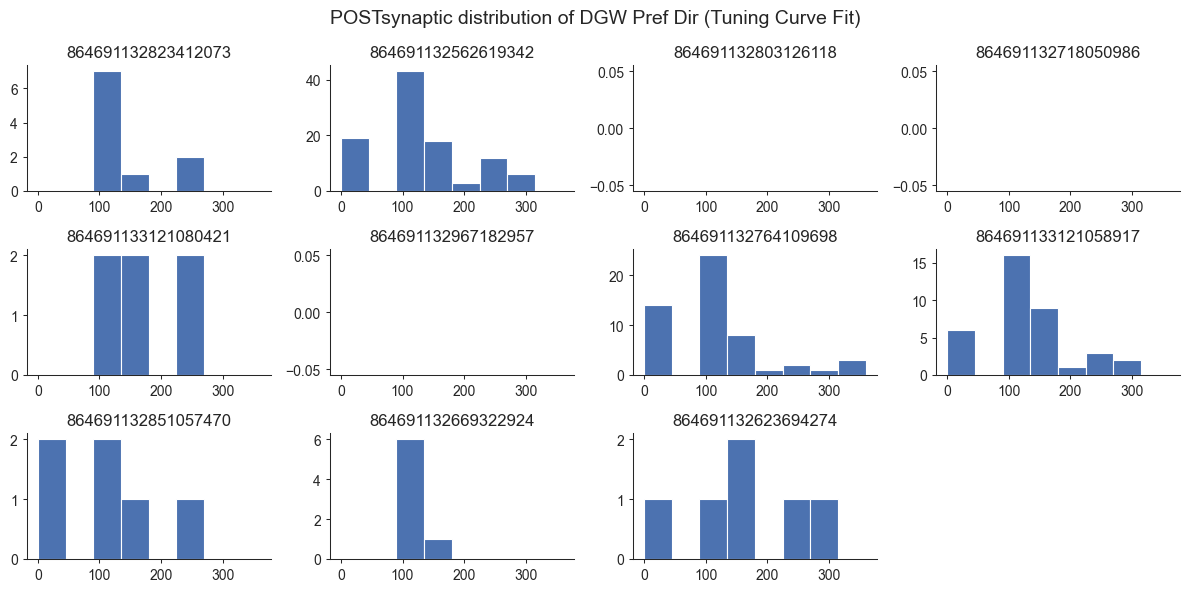

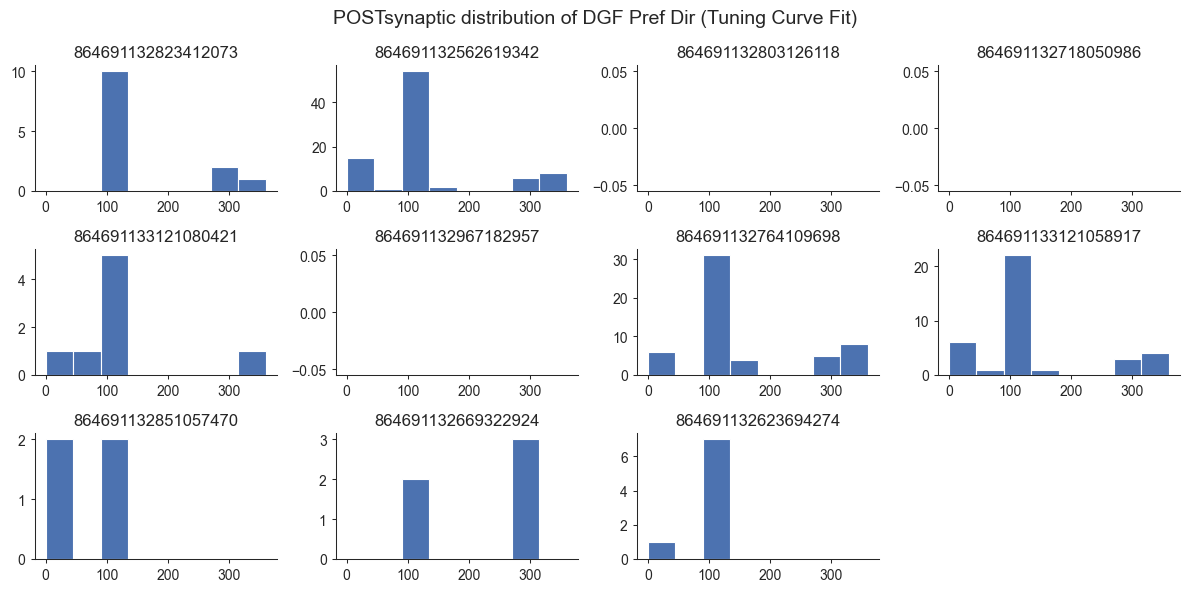

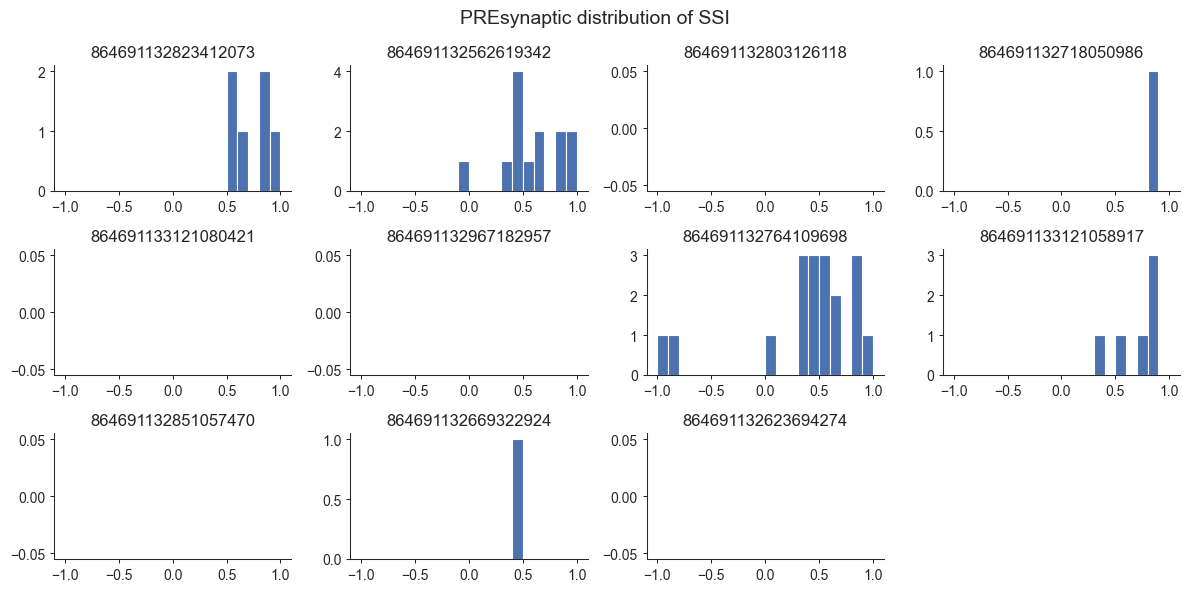

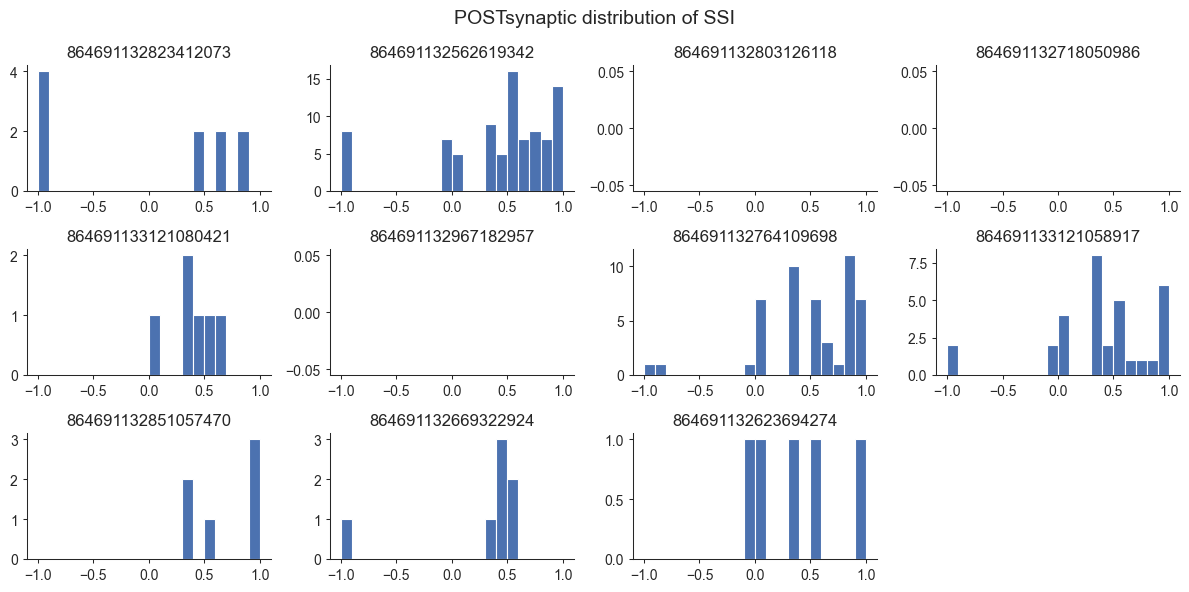

In [44]:
def plot_roi_counts(ax, den_syn, axo_syn, pre_met, post_met):
    bars = [
        ("pre", len(pre_met), "r"),
        ("pre-unq", len(pre_met.index.unique()), "r"),
        ("post", len(post_met), "b"),
        ("post-unq", len(post_met.index.unique()), "b"),
    ]
    bars2 = [
        ("pre-soma", np.mean(~den_syn.pre_soma_position.isna()), "g"),
        ("post-soma", np.mean(~axo_syn.post_soma_position.isna()), "g"),
    ]

    ax2 = ax.twinx()
    for a, b in (ax, bars), (ax2, bars2):
        a.bar([bb[0] for bb in b], [bb[1] for bb in b], color=[bb[2] for bb in b])
        ax.tick_params(axis="x", labelrotation=45)
    ax2.tick_params(axis="y", colors="g")  

dist_fn_euc = lambda this, other: np.sqrt(np.sum(np.square(this - other)))
dist_fn_horiz = lambda this, other: np.sqrt(np.sum(np.square(this[[0, 2]] - other[[0, 2]])))
dist_fn_vert = lambda this, other: other[1] - this[1] # e.g., +200 means other is 200 microns deeper than this

def plot_dist_soma(ax, syn, other_soma_key, dist_fn):
    syn_has_other_soma = syn.dropna(subset=other_soma_key)
    this_soma_key = "pre_soma_position" if other_soma_key == "post_soma_position" else "post_soma_position"
    soma_dists = syn_has_other_soma.apply(lambda row: dist_fn(row[this_soma_key], row[other_soma_key]), axis=1)
    # xmin, xmax = min(0, np.min(soma_dists)), np.max(soma_dists)
    xmin, xmax = 0, 700
    dist_range = np.arange(xmin, xmax+1, 1) # Steps of 1 micron
    frac_cells_within_dist = np.array([np.mean(soma_dists <= d) for d in dist_range])

    ax.plot(dist_range, frac_cells_within_dist)
    ax.axvspan(xmin=np.argmax(frac_cells_within_dist >= 0.25), xmax=np.argmax(frac_cells_within_dist >= 0.75), color="gray", alpha=0.4)
    ax.axvspan(xmin=np.argmax(frac_cells_within_dist >= 0.1), xmax=np.argmax(frac_cells_within_dist >= 0.9), color="gray", alpha=0.2)
    # ax.axvline(x=np.argmax(frac_cells_within_dist >= 0.9), color="purple", linestyle="dashed")
    ax.set_xlabel("$\mu$m", fontsize=10)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.twinx().set_ylim(0, ax.get_ylim()[1] * len(soma_dists))

def plot_vert_dist_soma(ax, syn, other_soma_key):
    syn_has_other_soma = syn.dropna(subset=other_soma_key)
    this_soma_key = "pre_soma_position" if other_soma_key == "post_soma_position" else "post_soma_position"
    other_soma_vert_pos = syn_has_other_soma.apply(lambda row: row[other_soma_key][1], axis=1)
    this_soma_vert_pos = syn[this_soma_key].values[0][1] # since all values are the same
    xmin, xmax = 0, 800, # np.max(other_soma_vert_pos)
    dist_range = np.arange(xmin, xmax+1, 1) # Steps of 1 micron
    frac_cells_within_dist = np.array([np.mean(other_soma_vert_pos <= d) for d in dist_range])

    ax.axvline(x=this_soma_vert_pos, color="black", linestyle="dashed")
    ax.axvspan(xmin=np.argmax(frac_cells_within_dist >= 0.25), xmax=np.argmax(frac_cells_within_dist >= 0.75), color="gray", alpha=0.4)
    ax.axvspan(xmin=np.argmax(frac_cells_within_dist >= 0.1), xmax=np.argmax(frac_cells_within_dist >= 0.9), color="gray", alpha=0.2)
    ax.plot(dist_range, frac_cells_within_dist)
    ax.set_xlabel("Depth ($\mu$m)", fontsize=10)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.twinx().set_ylim(0, ax.get_ylim()[1] * len(other_soma_vert_pos))

def scatter_soma_soma_dist_vs_syn_soma_dist(ax, syn, other_soma_key, dist_fn):
    # Scatter plot distance between pre- and postsynaptic somas (Y) vs. distance from synapse to postsynaptic soma (X)
    syn_has_other_soma = syn.dropna(subset=other_soma_key)
    mc_soma_key = "pre_soma_position" if other_soma_key == "post_soma_position" else "post_soma_position"
    syn_soma_dists = syn_has_other_soma.apply(lambda row: dist_fn_euc(row["position_microns"], row["post_soma_position"]), axis=1)
    soma_soma_dists = syn_has_other_soma.apply(lambda row: dist_fn(row[mc_soma_key], row[other_soma_key]), axis=1)

    at.density_scatter(x=syn_soma_dists, y=soma_soma_dists, ax=ax, xlabel="syn to postsyn-soma ($\mu$m)", ylabel="soma to soma ($\mu$m)", labelfontsize=10)

def scatter_syn_size_vs_syn_soma_dist(ax, syn, this_soma_key, dist_fn):
    syn_has_this_soma = syn.dropna(subset=this_soma_key)
    syn_sizes = syn_has_this_soma["size"]
    syn_soma_dists = syn_has_this_soma.apply(lambda row: dist_fn(row["position_microns"], row[this_soma_key]), axis=1)
    # syn_soma_dists = syn.apply(lambda row: dist_fn(row["position_microns"], row["post_soma_position"]), axis=1)
    at.density_scatter(x=syn_sizes, y=syn_soma_dists, ax=ax, xlabel="syn to MC-soma ($\mu$m)", ylabel="syn size", labelfontsize=10)

bins_pref_dir = np.arange(0, 360+45, 45)
bins_ssi = np.arange(-1, 1.1, 0.1)

frac_sig_trials = 0.25

plots = [
    # (
    #     "ROI counts for 2P-corresponded pre- and postsynaptic cells to each MC", 
    #     plot_roi_counts
    # ),
    # (
    #     "Fraction of PREsynaptic cells within a given EUCLIDEAN distance from MC",
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, den_syn, "pre_soma_position", dist_fn_euc)
    # ),
    # (
    #     "Fraction of POSTsynaptic cells within a given EUCLIDEAN distance from MC",
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, axo_syn, "post_soma_position", dist_fn_euc)
    # ),
    # (
    #     "Fraction of PREsynaptic cells within a given HORIZONTAL distance from MC",
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, den_syn, "pre_soma_position", dist_fn_horiz)
    # ),
    # (
    #     "Fraction of POSTsynaptic cells within a given HORIZONTAL distance from MC",
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, axo_syn, "post_soma_position", dist_fn_horiz)
    # ),
    # (
    #     "Fraction of PREsynaptic cells at different cortical depths",
    #     # lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, den_syn, "pre_soma_position", dist_fn_vert)
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_vert_dist_soma(ax, den_syn, "pre_soma_position")
    # ),
    # (
    #     "Fraction of POSTsynaptic cells at different cortical depths",
    #     # lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, axo_syn, "post_soma_position", dist_fn_vert)
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_vert_dist_soma(ax, axo_syn, "post_soma_position")
    # ),
    (
        "Horizontal distance between connected somas vs. Distance from MC DENDRITIC synapse to MC soma",
        lambda ax, den_syn, axo_syn, pre_met, post_met: scatter_soma_soma_dist_vs_syn_soma_dist(ax, den_syn, "pre_soma_position", dist_fn_horiz)
    ),
    (
        "Horizontal distance between connected somas vs. Distance from MC AXONAL synapse to POSTSYNAPTIC soma",
        lambda ax, den_syn, axo_syn, pre_met, post_met: scatter_soma_soma_dist_vs_syn_soma_dist(ax, axo_syn, "post_soma_position", dist_fn_horiz)
    ),
    (
        "DENDRITIC synapse size vs. Distance from DENDRITIC synapse to MC soma",
        lambda ax, den_syn, axo_syn, pre_met, post_met: scatter_syn_size_vs_syn_soma_dist(ax, den_syn, "post_soma_position", dist_fn_euc)
    ),
    (
        "AXONAL synapse size vs. Distance from AXONAL synapse to postsynaptic soma",
        lambda ax, den_syn, axo_syn, pre_met, post_met: scatter_syn_size_vs_syn_soma_dist(ax, axo_syn, "post_soma_position", dist_fn_euc)
    ),
    (
        "PREsynaptic distribution of DGW Pref Dir (Tuning Curve Fit)", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(pre_met.dgw_pref_dir[pre_met.dgw_frac_responsive_trials >= frac_sig_trials], bins=bins_pref_dir)
    ),
    (
        "POSTsynaptic distribution of DGW Pref Dir (Tuning Curve Fit)", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(post_met.dgw_pref_dir[post_met.dgw_frac_responsive_trials >= frac_sig_trials], bins=bins_pref_dir)
    ),
    (
        "POSTsynaptic distribution of DGF Pref Dir (Tuning Curve Fit)", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(post_met.dgf_pref_dir[post_met.dgf_frac_responsive_trials >= frac_sig_trials], bins=bins_pref_dir)
    ),
    (
        "PREsynaptic distribution of SSI", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(pre_met.ssi_fit[pre_met.dgw_frac_responsive_trials >= frac_sig_trials], bins=bins_ssi)
    ),
    (
        "POSTsynaptic distribution of SSI", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(post_met.ssi_fit[post_met.dgw_frac_responsive_trials >= frac_sig_trials], bins=bins_ssi)
    ),
]

for fig_title, plotter in plots:
    fig, axs = plt.subplots(figsize=(12, 6), nrows=3, ncols=4)

    for i, ax in enumerate(axs.flat):
        if i >= len(mc_pt_root_ids):
            ax.axis("off")
            continue
        
        mc_pt_root_id = mc_pt_root_ids[i]
        ax.set_title(f"{mc_pt_root_id}")

        cell_den_syn = dendritic_synapses[dendritic_synapses.post_pt_root_id == mc_pt_root_id]
        cell_den_syn_has_ophys = cell_den_syn[cell_den_syn.pre_pt_root_id.isin(corresponded_table.pt_root_id)]
        presyn_rois = cell_den_syn_has_ophys.pre_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
        presyn_metrics = metrics.loc[roi_lookup_to_metrics_idx[presyn_rois].values]
        
        cell_axo_syn = axonal_synapses[axonal_synapses.pre_pt_root_id == mc_pt_root_id]
        cell_axo_syn_has_ophys = cell_axo_syn[cell_axo_syn.post_pt_root_id.isin(corresponded_table.pt_root_id)]
        postsyn_rois = cell_axo_syn_has_ophys.post_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
        postsyn_metrics = metrics.loc[roi_lookup_to_metrics_idx[postsyn_rois].values]
        
        plotter(ax, cell_den_syn, cell_axo_syn, presyn_metrics, postsyn_metrics)

    fig.suptitle(fig_title, fontsize=14)
    fig.tight_layout()

    # TODO: Shade background based on SSI? (do this for PCs)
